### exercise 6: beyond linearity 

### task 2: logistic regression 

In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf

from scipy import stats
from matplotlib import pyplot as plt

%matplotlib inline
plt.style.use('ggplot')

In [2]:
Wages = pd.read_csv(r'C:\Users\Chijun Zhang\Documents\jupyter\machine learning exercise\datasets\Wage.csv')
Wages.head()

,Unnamed: 0,year,age,sex,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,231655,2006,18,1. Male,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,86582,2004,24,1. Male,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,161300,2003,45,1. Male,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,155159,2003,43,1. Male,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,11443,2005,50,1. Male,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154


In [3]:
Wages = Wages.rename(columns={'Unnamed: 0': 'id'})
print(pd.isnull(Wages).any())

id            False
year          False
age           False
sex           False
maritl        False
race          False
education     False
region        False
jobclass      False
health        False
health_ins    False
logwage       False
wage          False
dtype: bool


$P(\text{Wage} > 250 | \text{Age}) = \frac{\text{exp}(\beta_0 + \beta_1*age + \beta_2*age^2 + \beta_3*age^3 + \beta_4*age^4)}{1 + \text{exp}(\beta_0 + \beta_1*age + \beta_2*age^2 + \beta_3*age^3 + \beta_4*age^4)}$

In [4]:
Wages['high_earner'] = (Wages.wage > 250).astype(float)

model = smf.logit('high_earner ~ age + I(age**2) + I(age**3) + I(age**4)', data=Wages)

estimate = model.fit()
print(estimate.summary())

Optimization terminated successfully.
         Current function value: 0.116870
         Iterations 12
                           Logit Regression Results                           
Dep. Variable:            high_earner   No. Observations:                 3000
Model:                          Logit   Df Residuals:                     2995
Method:                           MLE   Df Model:                            4
Date:                Thu, 25 Aug 2022   Pseudo R-squ.:                 0.04013
Time:                        00:58:51   Log-Likelihood:                -350.61
converged:                       True   LL-Null:                       -365.27
Covariance Type:            nonrobust   LLR p-value:                 6.747e-06
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -109.5530     47.655     -2.299      0.022    -202.956     -16.150
age             8.9950   

In [5]:
new_ages = np.linspace(Wages.age.min(), Wages.age.max(), num=1000)

predictions = estimate.predict(exog=dict(age=new_ages))


std_err = np.array([])
for age in new_ages:
    
    x_age = np.array([[1,age,age**2,age**3,age**4]])
    
    var = np.dot(np.dot(x_age,estimate.cov_params()),x_age.T)
    
    std_err = np.append(std_err, np.sqrt(var))
    
    
crit_value = stats.t.isf(.05/2,len(Wages)-1)

widths = crit_value*std_err

linear_fit_vals = estimate.predict(exog=dict(age=new_ages), linear=True)


ui_linear = linear_fit_vals + widths
li_linear = linear_fit_vals - widths


ui = np.exp(ui_linear)/(1+np.exp(ui_linear))
li = np.exp(li_linear)/(1+np.exp(li_linear))

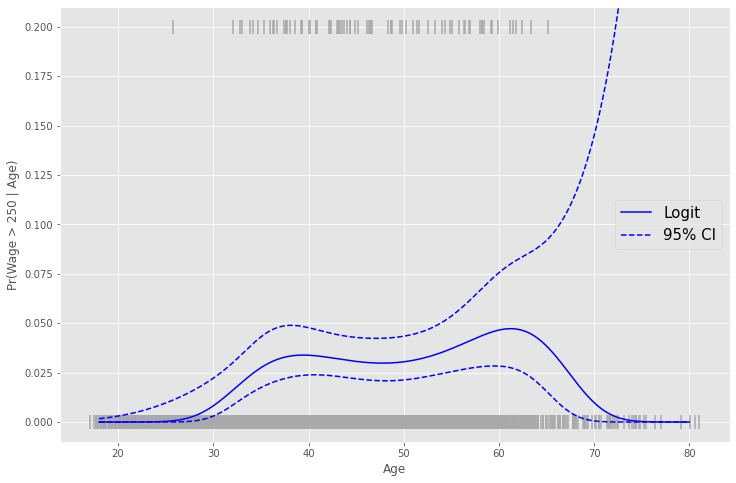

In [6]:
fig, ax = plt.subplots(figsize=(12,8))

def rand_jitter(arr):
    stdev = .01*(max(arr)-min(arr))
    return arr + np.random.randn(len(arr)) * stdev

ax.scatter(rand_jitter(Wages.age.values), Wages.high_earner.values/5, marker='|', color='darkgray', s=200)

ax.plot(new_ages,predictions,color='b',label='Logit')

ax.plot(new_ages, ui, color='b', linestyle='--', label='95% CI')
ax.plot(new_ages, li, color= 'b', linestyle='--')

ax.set_ylim([-.01,0.21]);
ax.set_xlabel('Age')
ax.set_ylabel('Pr(Wage > 250 | Age)');
plt.legend(loc='best', prop={'size':15});